# IT3385 MLOps Assignment 
<b>Business Objective:</b> You are tasked to train an ML model to predict the selling price
of an HDB resale flat based on its characteristics e.g. distance to the Central Business
District (CBD), distance to the nearest MRT station, floor area, floor level and
remaining years of the lease.

<b>Dataset used:</b> 01 - HDB Resale Transactions <br> 
<b>Target Variable:</b> Resale price <br>
<b>Problem:</b>Regression

## EDA - Exploratory Data Analysis 
EDA is used to analyse the data and discover trends, and patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

<b>Basic Data Understanding: </b>
1. Columns and Data Types 
2. Checking for null values
3. Check for duplicates
4. Box plot for outliers
5. Distribution of data
6. Correlation matrix

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from matplotlib import colors as c
from matplotlib import gridspec as grid

In [9]:
df = pd.read_csv('01_hdb_resale_transactions.csv')

In [4]:
print("The first 10 rows of the data:")
df.head(10)

The first 10 rows of the data:


,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,174,ANG MO KIO AVENUE 4,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,1.375097,103.837619,10296.855750,1096.947897
1,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,1.373922,103.855621,10065.227930,847.235690
2,163,ANG MO KIO AVENUE 4,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,1.373552,103.838169,10118.831550,1176.742184
3,446,ANG MO KIO AVENUE 10,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,1.367761,103.855357,9383.300907,682.205473
4,557,ANG MO KIO AVENUE 10,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,1.371626,103.857736,9825.917255,953.047695
5,603,ANG MO KIO AVENUE 5,ANG MO KIO,560603,2015-01,3 ROOM,07 TO 09,67.0,New Generation,1980,290000.0,1.380201,103.835756,10886.292880,1040.755276
6,603,ANG MO KIO AVENUE 5,ANG MO KIO,560603,2015-01,4 ROOM,07 TO 09,91.0,New Generation,1980,450000.0,1.380201,103.835756,10886.292880,1040.755276
7,709,ANG MO KIO AVENUE 8,ANG MO KIO,560709,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1980,290000.0,1.371137,103.847662,9754.165210,274.786701
8,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,293000.0,1.361343,103.851699,8662.831360,928.311457
9,109,ANG MO KIO AVENUE 4,ANG MO KIO,560109,2015-01,3 ROOM,01 TO 03,67.0,New Generation,1978,300000.0,1.370097,103.837688,9749.107068,1311.656154


In [5]:
print(f"The data set consists of {df.shape[0]} rows and {df.shape[1]} columns.")

The data set consists of 194240 rows and 15 columns.


### Check for null values

In [6]:
print("The existence of missing values in each column:")
df.isnull().any()

The existence of missing values in each column:


block                  False
street_name            False
town                   False
postal_code            False
month                  False
flat_type              False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
latitude               False
longitude              False
cbd_dist               False
min_dist_mrt           False
dtype: bool

In [7]:
print("General information about the data:")
df.info()

General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194240 entries, 0 to 194239
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                194240 non-null  object 
 1   street_name          194240 non-null  object 
 2   town                 194240 non-null  object 
 3   postal_code          194240 non-null  int64  
 4   month                194240 non-null  object 
 5   flat_type            194240 non-null  object 
 6   storey_range         194240 non-null  object 
 7   floor_area_sqm       194240 non-null  float64
 8   flat_model           194240 non-null  object 
 9   lease_commence_date  194240 non-null  int64  
 10  resale_price         194240 non-null  float64
 11  latitude             194240 non-null  float64
 12  longitude            194240 non-null  float64
 13  cbd_dist             194240 non-null  float64
 14  min_dist_mrt         194240 non-

In [8]:
print("The number of unique values in each column:")
df.nunique()

The number of unique values in each column:


block                  2668
street_name             572
town                     26
postal_code            9493
month                   103
flat_type                 7
storey_range             17
floor_area_sqm          172
flat_model               21
lease_commence_date      54
resale_price           3842
latitude               9494
longitude              9463
cbd_dist               9494
min_dist_mrt           9494
dtype: int64

### Check for duplicates and remove them

In [10]:
print("Number of duplicates: ")
print(len(df)-len(df.drop_duplicates()))

Number of duplicates: 
363


In [11]:
df = df.drop_duplicates()
df.shape

(193877, 15)

### Box plot for outliers

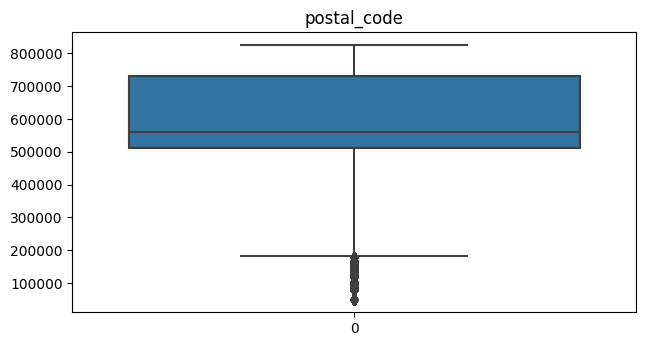

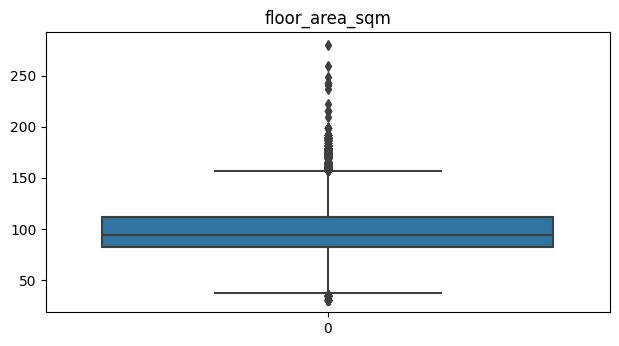

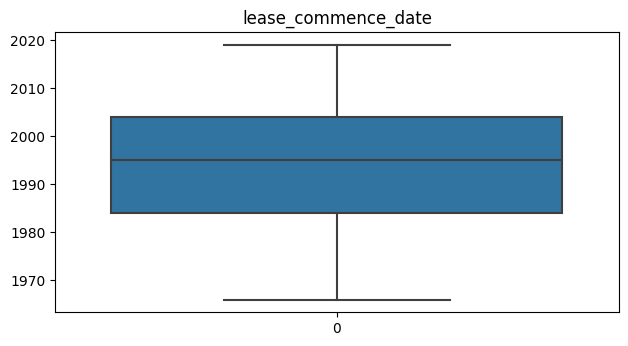

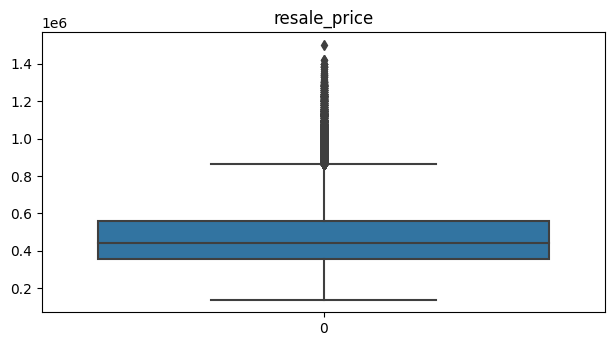

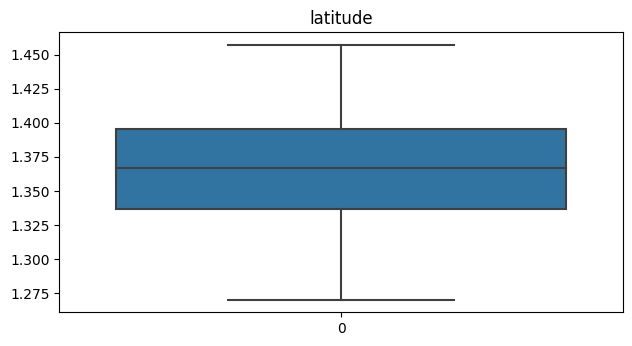

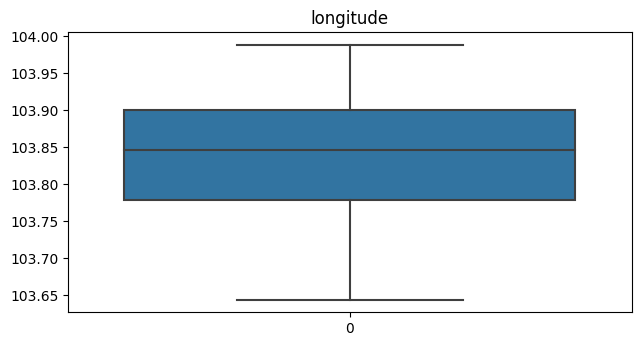

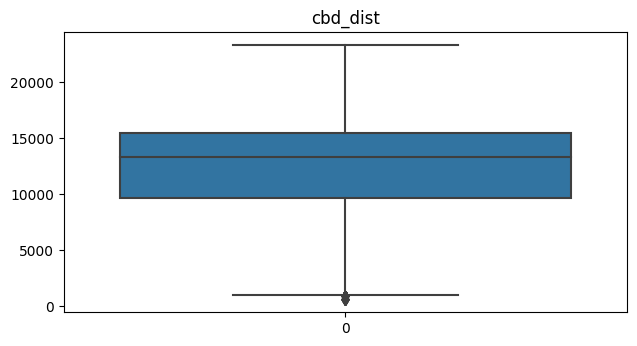

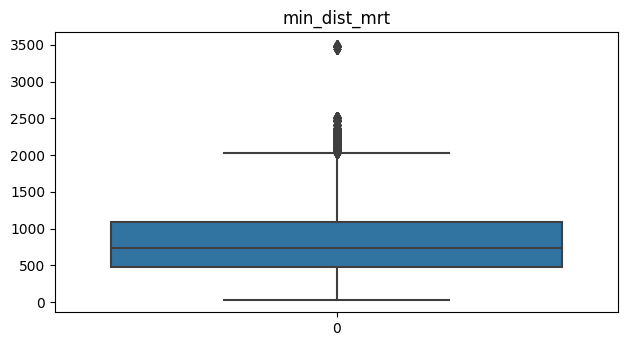

In [21]:
for column in df.columns:
    if df[column].dtype!= 'object':
        plt.figure(figsize=(16,8))
        plt.subplot(2,2,2)
        sns.boxplot(df[column])
        plt.title(column)
        plt.show()

Text(0.5, 1.0, 'resale_price')

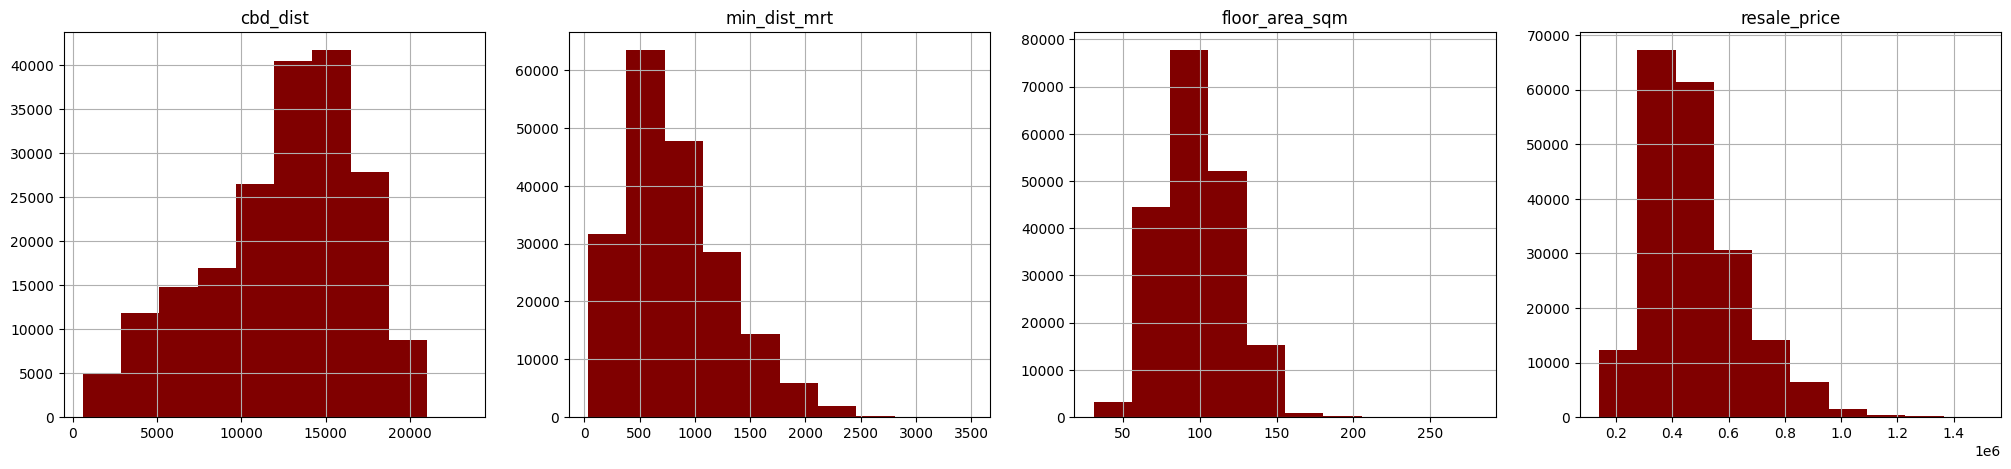

In [22]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(25, 5)
df['cbd_dist'].hist(ax=axes[0], color='maroon')
axes[0].set_title('cbd_dist')
df['min_dist_mrt'].hist(ax=axes[1], color='maroon')
axes[1].set_title('min_dist_mrt')
df['floor_area_sqm'].hist(ax=axes[2], color='maroon')
axes[2].set_title('floor_area_sqm')
df['resale_price'].hist(ax=axes[3], color='maroon')
axes[3].set_title('resale_price')


------ Exploring flat_type ------
4 ROOM              81114
5 ROOM              48332
3 ROOM              46951
EXECUTIVE           14820
2 ROOM               2870
MULTI-GENERATION       78
1 ROOM                 75
Name: flat_type, dtype: int64
count     194240
unique         7
top       4 ROOM
freq       81114
Name: flat_type, dtype: object


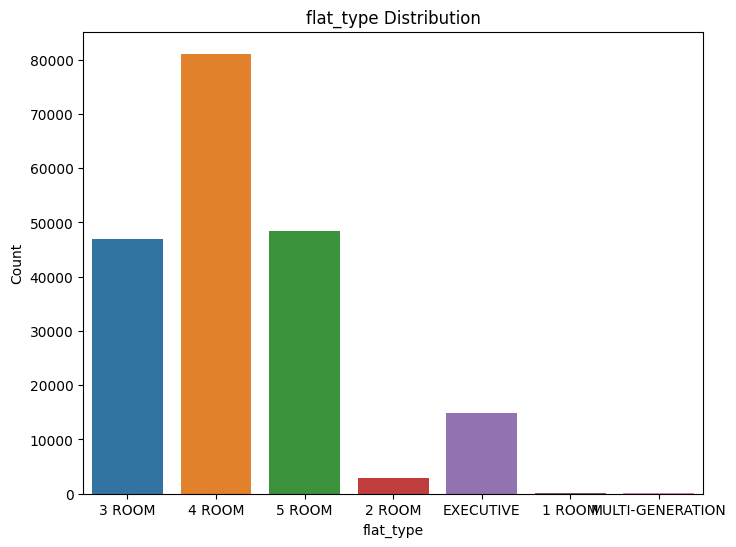


------ Exploring town ------
SENGKANG           15812
WOODLANDS          13663
PUNGGOL            13222
TAMPINES           13193
JURONG WEST        13192
YISHUN             12939
BEDOK              10892
HOUGANG             9619
CHOA CHU KANG       8953
ANG MO KIO          8368
BUKIT MERAH         7371
BUKIT PANJANG       7343
BUKIT BATOK         6996
TOA PAYOH           6100
PASIR RIS           5989
KALLANG/WHAMPOA     5864
QUEENSTOWN          5399
SEMBAWANG           5028
GEYLANG             4925
CLEMENTI            4520
JURONG EAST         4066
SERANGOON           3723
BISHAN              3642
CENTRAL AREA        1706
MARINE PARADE       1225
BUKIT TIMAH          490
Name: town, dtype: int64
count       194240
unique          26
top       SENGKANG
freq         15812
Name: town, dtype: object


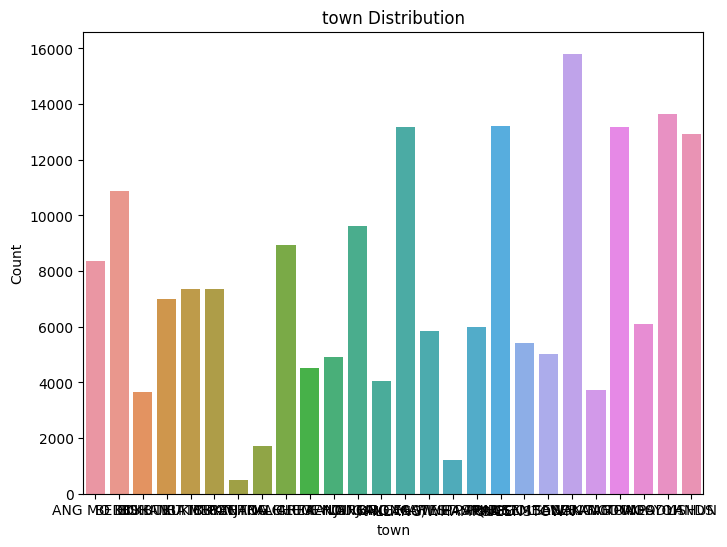

In [7]:
columns = ['flat_type','town']
for column in columns:
    if df[column].dtype == 'object':
        # Categorical column
        print(f"\n------ Exploring {column} ------")
        print(df[column].value_counts())  
        print(df[column].describe()) 
        
        # Plot count plot
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

### Correlation matrix

C:\Users\user\AppData\Local\Temp\ipykernel_7288\1457089765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')


<Axes: >

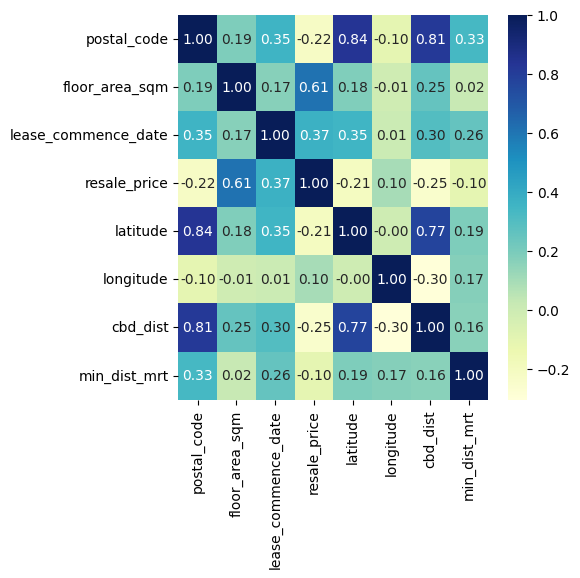

In [5]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

### Dropping of columns
Dropped latitude, longditude, and street_name as street_name and town were almost the same and therefore I chose to use town instead as I was afraid that people might type thier street_name wrongly or have a typo. I removed latitude and logditude as it is so highly correlated to postal code with a correlation of 0.84 therefore I got rid of those 2 columns and keep postal code.

In [12]:
df = df.drop(columns=['latitude','longitude','street_name'])

In [13]:
data = df.sample(frac=0.94, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (182244, 12)
Unseen Data For Predictions: (11633, 12)


## Data Preparation - Using Pycaret
This process includes preprocessing tasks that I have configured such as:
- normalizing  
- transformation of target  
- removal of outliers
- defining training size

In [14]:
import pycaret
from pycaret.regression import *
s = setup(data, target = 'resale_price', session_id = 123,transform_target=True, normalize=True,train_size=0.8,remove_outliers=True)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(182244, 12)"
4,Transformed data shape,"(174954, 54)"
5,Transformed train set shape,"(138505, 54)"
6,Transformed test set shape,"(36449, 54)"
7,Numeric features,5
8,Categorical features,6
9,Preprocess,True


In [15]:
get_config('dataset_transformed')

,block,town,postal_code,month,flat_type_5 ROOM,flat_type_4 ROOM,flat_type_3 ROOM,flat_type_EXECUTIVE,flat_type_2 ROOM,flat_type_1 ROOM,...,flat_model_Terrace,flat_model_3Gen,flat_model_Premium Maisonette,flat_model_Premium Apartment Loft,flat_model_Improved-Maisonette,flat_model_Multi Generation,lease_commence_date,cbd_dist,min_dist_mrt,resale_price
93844,-1.059832,-0.833935,0.899838,-0.860051,1.739561,-0.878766,-0.570578,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,0.699389,1.345110,-0.200019,4.269867
79471,1.239351,1.701537,-2.233535,-0.571911,-0.574858,1.137960,-0.570578,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,0.097773,-2.174460,-0.635813,4.305697
48201,-1.095556,-0.875103,0.243715,-0.734906,-0.574858,-0.878766,1.752610,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,-1.707076,0.622467,0.554153,4.240918
13385,1.871590,1.717224,-2.287690,-0.986095,-0.574858,-0.878766,1.752610,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,1.000197,-1.488186,-1.300462,4.279453
29665,0.619221,-0.758427,-1.051971,-0.708186,-0.574858,-0.878766,1.752610,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,-1.932682,-1.514458,-1.098857,4.243164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28176,-0.729625,-0.165132,-1.375690,-0.661654,-0.574858,-0.878766,1.752610,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,-1.631874,-1.598546,-0.501191,4.253610
142217,0.158419,-0.166738,-1.374735,1.887354,-0.574858,1.137960,-0.570578,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,-0.428641,-1.680722,0.258666,4.297005
78287,3.123975,1.716605,-2.282449,1.519380,-0.574858,-0.878766,1.752610,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,1.225803,-1.849539,-0.456126,4.294193
20770,2.826780,-0.761381,-1.030550,0.055934,-0.574858,1.137960,-0.570578,-0.256547,-0.088111,-0.019931,...,-0.025214,-0.008061,-0.010054,-0.022964,-0.012017,-0.020644,1.601813,-1.370911,-1.024202,4.307442


In [16]:
print(f'Ordinal features: {s._fxs["Ordinal"]}')
print(f'Numeric features: {s._fxs["Numeric"]}')
print(f'Categorical features: {s._fxs["Categorical"]}')

Ordinal features: {}
Numeric features: ['postal_code', 'floor_area_sqm', 'lease_commence_date', 'cbd_dist', 'min_dist_mrt']
Categorical features: ['block', 'town', 'month', 'flat_type', 'storey_range', 'flat_model']


## Comparing the Models
In this step, we are able to get our best model by looking at the table below which shows us each model and its R2, MSE, RMSE etc.
Additionally, we are able to tune the hyperparameters of our best model. 

In this case our best model is catboost, however when I save and load the model and try to predict, they say that catboost module not found. When searching why this happened, they said that it was because the scikit-learn version was not compatible however when I updated my version, more problems popped up therefore I chose to use lightgbm as my best model as lightgbm and catboost has almost the same R2.

In [8]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24993.2257,1212591827.2766,34813.9533,0.9546,0.0706,0.0539,25.0790
lightgbm,Light Gradient Boosting Machine,25642.6158,1342719545.3699,36639.2721,0.9497,0.0707,0.0539,4.8050
xgboost,Extreme Gradient Boosting,27618.5736,1662384115.2000,40705.4043,0.9377,0.0772,0.0581,26.4840
knn,K Neighbors Regressor,28397.4922,1983623667.2000,44530.0316,0.9257,0.0816,0.0581,4.0050
et,Extra Trees Regressor,33022.7858,2065782028.7487,45448.2182,0.9226,0.0906,0.0709,37.8770
gbr,Gradient Boosting Regressor,33059.0821,2239045914.7176,47315.5659,0.9161,0.0887,0.0677,35.8200
ridge,Ridge Regression,39788.4234,3256412905.8184,56976.7843,0.8779,0.1063,0.0824,0.6870
br,Bayesian Ridge,39788.2362,3255297559.8984,56967.7668,0.8779,0.1063,0.0824,1.6120
huber,Huber Regressor,39689.7550,3332636257.7879,57609.8058,0.8750,0.1067,0.0819,2.4330
rf,Random Forest Regressor,45964.7466,3830279668.1122,61880.2996,0.8564,0.1251,0.0999,42.9960


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [17]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26271.4000,1382379118.5866,37180.3593,0.9477,0.0729,0.0555
1,26899.2040,1502307992.3452,38759.6181,0.9442,0.0730,0.0556
2,26213.7186,1409877525.1906,37548.3359,0.9468,0.0719,0.0546
3,26091.3984,1417442502.6281,37648.9376,0.9469,0.0708,0.0541
4,26246.5323,1373271998.2341,37057.6847,0.9481,0.0711,0.0547
5,25933.2088,1380163574.5945,37150.5528,0.9478,0.0716,0.0542
6,25932.9937,1344581731.1822,36668.5387,0.9492,0.0711,0.0544
7,26779.7026,1480286269.2311,38474.4886,0.9443,0.0731,0.0557
8,26678.9473,1471460655.5925,38359.6227,0.9451,0.0731,0.0556


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Hyper-parameter tuning of the LightGBM model

In [8]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29427.5237,1803911015.1002,42472.4736,0.9322,0.0815,0.0619
1,28874.3942,1664306328.0787,40795.9107,0.9372,0.0799,0.0613
2,28809.0050,1691503693.0151,41127.8943,0.9377,0.0794,0.0606
3,28751.5744,1620017575.3498,40249.4419,0.9396,0.0792,0.0608
4,27828.7587,1524965162.4096,39050.8023,0.9431,0.0783,0.0600
5,28140.5759,1613220308.2974,40164.9139,0.9405,0.0776,0.0594
6,27849.2407,1549869693.2741,39368.3844,0.9405,0.0776,0.0590
7,28105.7157,1599507305.8586,39993.8408,0.9407,0.0781,0.0596
8,28192.5702,1540549575.0756,39249.8354,0.9415,0.0779,0.0601


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


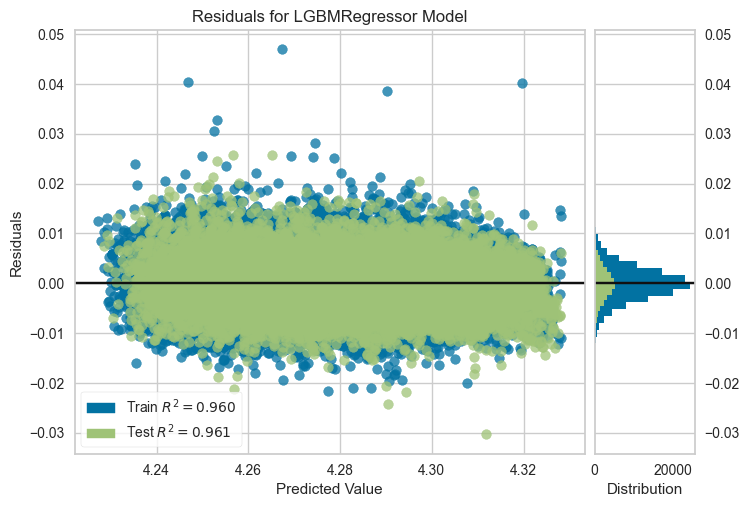

In [18]:
plot_model(lightgbm, plot = 'residuals')

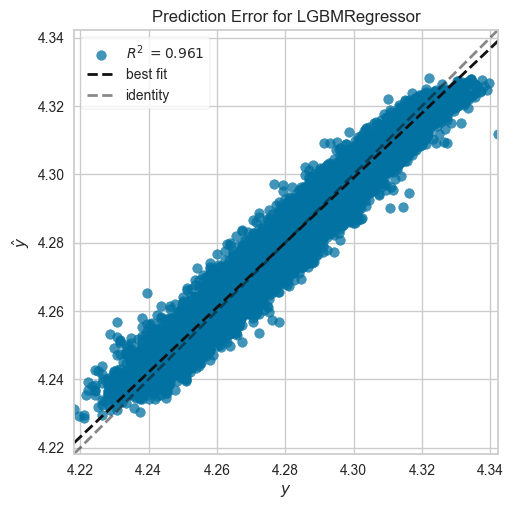

In [19]:
plot_model(lightgbm, plot = 'error')

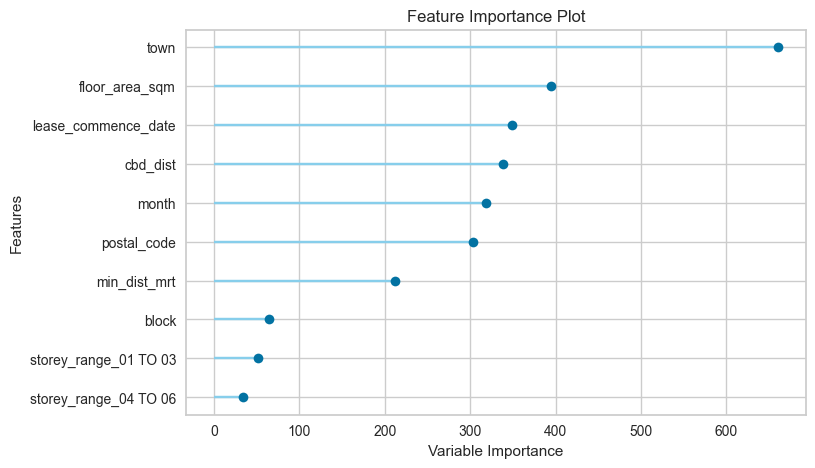

In [20]:
plot_model(lightgbm, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

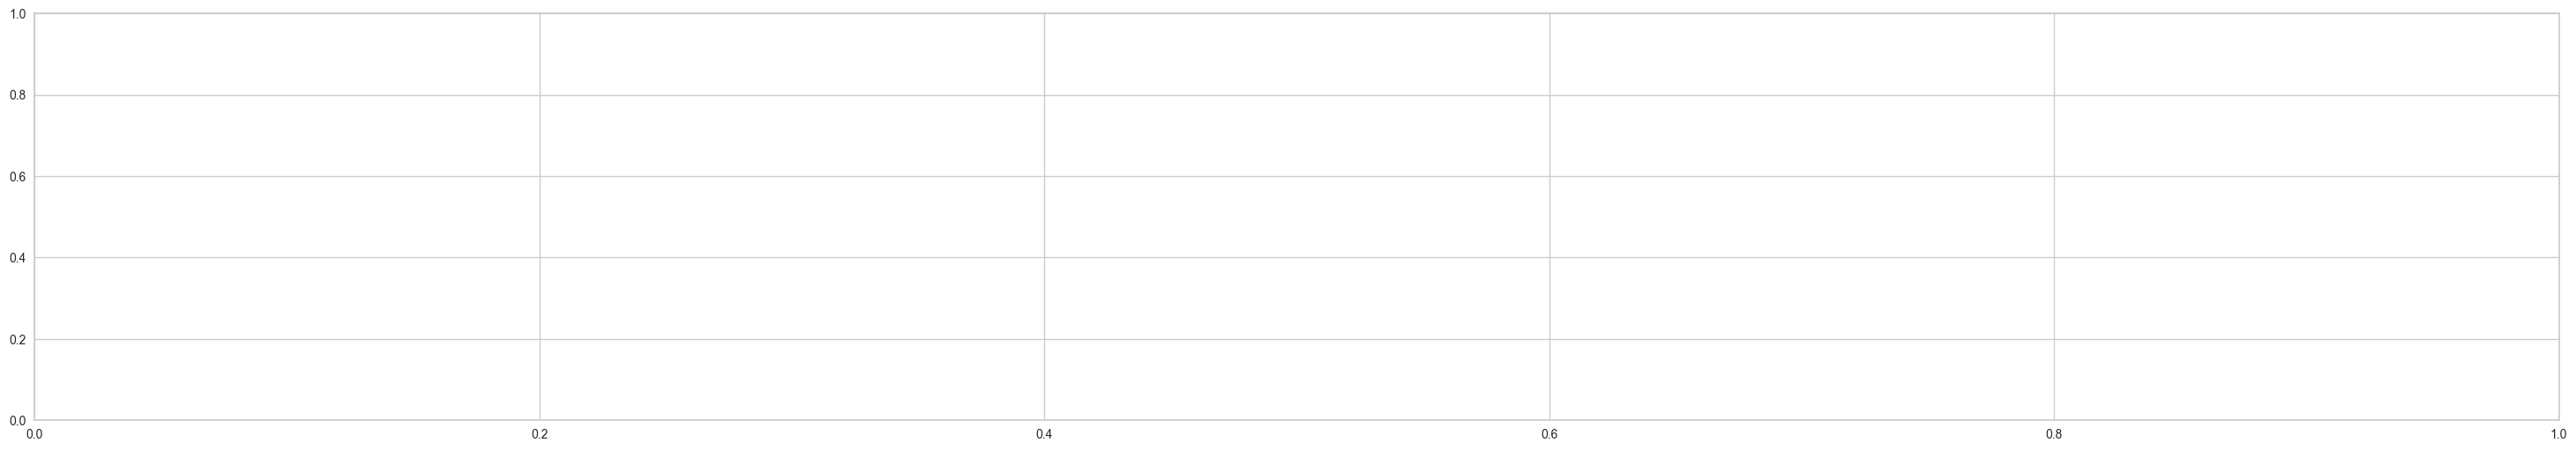

In [11]:
evaluate_model(lightgbm)

In [9]:
holdout_pred = predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,473482.1421,249519329089.5862,499519.0978,-676162649038877.5000,11.3462,109129.3688


In [10]:
holdout_pred.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
153111,225,YISHUN STREET 21,YISHUN,760225,2020-09,4 ROOM,04 TO 06,93.0,New Generation,1985,16876.947266,602.569214,349000.0,337572.653941
98187,209B,PUNGGOL PLACE,PUNGGOL,822209,2022-02,4 ROOM,10 TO 12,92.0,Model A,2014,14039.796875,1075.874634,510000.0,516846.200380
159825,146,GANGSA ROAD,BUKIT PANJANG,670146,2022-07,5 ROOM,07 TO 09,122.0,Improved,1988,13942.963867,660.915283,600000.0,605400.727635
112583,107,SERANGOON NORTH AVENUE 1,SERANGOON,550107,2017-04,3 ROOM,13 TO 15,60.0,Improved,1984,9837.111328,1970.521729,290000.0,274665.552808
94413,113A,MCNAIR ROAD,KALLANG/WHAMPOA,322113,2022-02,4 ROOM,19 TO 21,93.0,Premium Apartment,2017,4362.709961,264.126587,929000.0,894182.387713


In [11]:
unseen_predictions = predict_model(lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,475457.5290,251840632899.2289,501837.2574,-674230440248328.5000,11.3497,109577.2558


,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
0,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,8662.831055,928.311462,293000.0,293528.724497
1,315B,ANG MO KIO STREET 31,ANG MO KIO,563315,2015-01,5 ROOM,13 TO 15,110.0,Improved,2006,8969.700195,636.432739,755000.0,735081.264434
2,76,BEDOK NORTH ROAD,BEDOK,460076,2015-01,3 ROOM,04 TO 06,59.0,Improved,1978,11275.445312,500.376587,288000.0,272556.340335
3,401,BEDOK NORTH AVENUE 3,BEDOK,460401,2015-01,3 ROOM,10 TO 12,67.0,New Generation,1979,10585.365234,640.515686,332000.0,323258.982726
4,512,BEDOK NORTH AVENUE 2,BEDOK,460512,2015-01,4 ROOM,01 TO 03,92.0,New Generation,1979,10302.207031,494.111023,355000.0,378549.157428


In [12]:
predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,473708.9009,248712432311.9934,498710.7702,-725404127557790.1250,11.3575,110492.6878


,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
16682,33,GHIM MOH LINK,QUEENSTOWN,270033,2023-03,3 ROOM,22 TO 24,68.0,Model A,2018,7979.812988,659.479187,685000.0,668921.288686
155878,138C,LORONG 1A TOA PAYOH,TOA PAYOH,313138,2018-08,5 ROOM,25 TO 27,114.0,DBSS,2012,5932.486816,502.727203,985000.0,966598.760458
9084,228B,COMPASSVALE WALK,SENGKANG,542228,2016-01,4 ROOM,04 TO 06,101.0,Model A,1999,12874.702148,774.526001,385000.0,371854.092579
30885,116,BUKIT BATOK WEST AVENUE 6,BUKIT BATOK,650116,2022-08,4 ROOM,04 TO 06,107.0,Model A,1984,13806.487305,343.997986,508000.0,498586.511479
168406,105A,EDGEFIELD PLAINS,PUNGGOL,821105,2016-08,5 ROOM,13 TO 15,110.0,Improved,2003,13979.569336,1279.230835,468888.0,456376.767094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28176,69,LORONG 4 TOA PAYOH,TOA PAYOH,310069,2016-06,3 ROOM,10 TO 12,62.0,Standard,1973,5661.484375,597.146484,280000.0,294744.101382
142217,246,KIM KEAT LINK,TOA PAYOH,310246,2022-10,4 ROOM,01 TO 03,104.0,Model A,1989,5307.507812,941.685669,590000.0,545016.384195
78287,61A,STRATHMORE AVENUE,QUEENSTOWN,142061,2022-08,3 ROOM,04 TO 06,69.0,Model A,2011,4580.314453,617.580322,560000.0,587819.996938
20770,18D,CIRCUIT ROAD,GEYLANG,374018,2020-10,4 ROOM,13 TO 15,93.0,Model A,2016,6642.043945,359.999725,720000.0,740007.578899


### Finalise Model

In [9]:
final_model = finalize_model(lightgbm)
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                             'lease_commence_date', 'cbd_dist',
                                             'min_dist_mrt'],
                                    tra...
                 TransformerWrapper(include=['block', 'town', 'month'],
                                    transformer=LeaveOneOutEncoder(cols=['block',
                                                                         'town',
                                                                         'month'],
                                                                   handle_missing='return_nan',
                                      

### Save Model

In [11]:
save_model(final_model,'final_model_lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_commence_date', 'cbd_dist',
                                              'min_dist_mrt'],
                                     tra...
                  TransformerWrapper(include=['block', 'town', 'month'],
                                     transformer=LeaveOneOutEncoder(cols=['block',
                                                                          'town',
                                                                          'month'],
                                                                    handle_missing='return_nan',
                         

## Try loading of model and prediction on unseen data

In [12]:
loaded_best_pipeline = load_model('final_model_lightgbm')

Transformation Pipeline and Model Successfully Loaded


In [13]:
predict = predict_model(loaded_best_pipeline, data = data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,474012.5625,248977931809.0186,498976.8850,-729514362849391.0000,11.3591,110689.9074


In [14]:
predict.head()

,block,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,resale_price,prediction_label
0,333,ANG MO KIO,560333,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,8662.831055,928.311462,293000.0,277272.329181
1,315B,ANG MO KIO,563315,2015-01,5 ROOM,13 TO 15,110.0,Improved,2006,8969.700195,636.432739,755000.0,767438.774063
2,76,BEDOK,460076,2015-01,3 ROOM,04 TO 06,59.0,Improved,1978,11275.445312,500.376587,288000.0,260378.306746
3,401,BEDOK,460401,2015-01,3 ROOM,10 TO 12,67.0,New Generation,1979,10585.365234,640.515686,332000.0,315165.525726
4,512,BEDOK,460512,2015-01,4 ROOM,01 TO 03,92.0,New Generation,1979,10302.207031,494.111023,355000.0,389761.101684


In [21]:
data = [["333","ANG MO KIO",560333,"2015-01",'3 ROOM','01 TO 03',68.0,'New Generation',1981,8662.831055,928.311462]]
data = pd.DataFrame(data,columns = cols)
data

,block,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt
0,333,ANG MO KIO,560333,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,8662.831055,928.311462


In [20]:
cols = ['block', 'town', 'postal_code', 'month', 'flat_type',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date','cbd_dist', 'min_dist_mrt']

In [22]:
predict = predict_model(loaded_best_pipeline, data = data)


In [23]:
predict.head()

,block,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,cbd_dist,min_dist_mrt,prediction_label
0,333,ANG MO KIO,560333,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,8662.831055,928.311462,295586.027316


In [24]:
predict.prediction_label[0]

295586.02731625387